In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12, 4
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

In [ ]:
df = pd.read_csv('hotel_bookings_data_bersih.csv')

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
df.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
118330,City Hotel,0,179,2019,October,34,21,1,4,2,Breakfast,Kabupaten Magelang,Direct,Direct,0,0,0,0,No Deposit,14.0,0,Personal,165.0,0,1,Check-Out
69407,City Hotel,1,169,2019,August,23,8,0,3,2,Breakfast,Kota Denpasar,Offline TA/TO,TA/TO,0,0,0,0,Non Refund,19.0,0,Personal,170.0,0,0,Canceled
89543,City Hotel,0,22,2018,February,51,14,0,2,2,Breakfast,Kota Denpasar,Online TA,TA/TO,1,0,1,0,No Deposit,9.0,0,Personal,114.0,0,1,Check-Out
87786,City Hotel,0,180,2018,July,19,2,1,1,2,Breakfast,Kabupaten Kepulauan Seribu,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,3.0,0,Family,100.0,0,1,Check-Out
45802,City Hotel,0,146,2017,February,53,29,0,3,1,Breakfast,Kabupaten Garut,Offline TA/TO,TA/TO,0,0,0,1,No Deposit,21.0,99,Family,65.0,0,0,Check-Out


In [ ]:
df['stays_in_nights'] = df['stays_in_weekend_nights'] + df['stays_in_weekdays_nights']

In [ ]:
df.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,stays_in_nights
34263,Resort Hotel,0,170,2019,May,12,20,4,10,1,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,0,Personal,40.0,0,3,Check-Out,14
51751,City Hotel,1,330,2018,August,23,2,0,2,2,Breakfast,Kota Denpasar,Groups,TA/TO,0,0,0,0,Non Refund,1.0,0,Personal,62.0,0,0,Canceled,2
109753,City Hotel,0,44,2019,June,16,20,1,3,2,Breakfast,Kabupaten Bandung,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,6.0,0,Family,85.0,0,0,Check-Out,4
72922,City Hotel,1,114,2019,October,34,21,1,1,2,Dinner,Kota Batu,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,0,Personal,193.0,0,1,Canceled,2
98635,City Hotel,0,85,2018,December,41,6,1,3,2,Breakfast,Kota Surabaya,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,6.0,0,Family,85.0,0,1,Check-Out,4


In [ ]:
amount_stays = df.groupby(['hotel', 'arrival_date_year', 'arrival_date_month', 'is_canceled']).agg({'reservation_status' : 'count'})

In [ ]:
amount_stays

reservation_status
hotel        arrival_date_year arrival_date_month is_canceled                    
City Hotel   2017              December           0                          2065
                                                  1                          1307
                               February           0                           986
                                                  1                           668
                               January            0                           933
...                                                                           ...
Resort Hotel 2019              May                1                           394
                               October            0                          1107
                                                  1                           693
                               September          0                          1094
                                                  1                           660

[104 rows x 1 columns]

In [ ]:
pivot_amount = amount_stays.pivot_table(index=['arrival_date_year', 'arrival_date_month'], columns=['hotel', 'is_canceled'], values='reservation_status', fill_value=0)

In [ ]:
pivot_amount

hotel                                City Hotel         Resort Hotel       
is_canceled                                   0       1            0      1
arrival_date_year arrival_date_month                                       
2017              December               2065.0  1307.0       1138.0  409.0
                  February                986.0   668.0        941.0  305.0
                  January                 933.0   301.0        901.0  185.0
                  November               1986.0  1543.0       1020.0  535.0
                  October                1248.0  1228.0       1031.0  366.0
                  September               459.0   939.0       1045.0  320.0
2018              April                  1441.0   930.0       1080.0  406.0
                  August                 2203.0  1720.0        982.0  375.0
                  December               2272.0  1947.0       1392.0  565.0
                  February               1406.0  1069.0       1032.0  321.0
                  January                1761.0  1359.0       1037.0  275.0
                  July                   2240.0  1436.0       1311.0  479.0
                  June                   2022.0  1539.0       1323.0  520.0
                  March                   926.0   438.0        732.0  119.0
                  May                    1938.0  1108.0       1374.0  368.0
                  November               2304.0  1567.0       1057.0  455.0
                  October                2131.0  1247.0       1099.0  577.0
                  September              2088.0  1043.0        971.0  450.0
2019              April                  1623.0   971.0       1173.0  388.0
                  August                 2163.0  1808.0       1045.0  631.0
                  July                   2339.0  2217.0       1212.0  545.0
                  June                   1993.0  1922.0       1195.0  531.0
                  March                  1328.0  1044.0       1082.0  205.0
                  May                    2134.0  1278.0       1145.0  394.0
                  October                2002.0  1123.0       1107.0  693.0
                  September              2235.0  1324.0       1094.0  660.0

In [ ]:
df2 = pivot_amount.reset_index()

In [ ]:
df2

hotel       arrival_date_year arrival_date_month City Hotel          \
is_canceled                                               0       1   
0                        2017           December     2065.0  1307.0   
1                        2017           February      986.0   668.0   
2                        2017            January      933.0   301.0   
3                        2017           November     1986.0  1543.0   
4                        2017            October     1248.0  1228.0   
5                        2017          September      459.0   939.0   
6                        2018              April     1441.0   930.0   
7                        2018             August     2203.0  1720.0   
8                        2018           December     2272.0  1947.0   
9                        2018           February     1406.0  1069.0   
10                       2018            January     1761.0  1359.0   
11                       2018               July     2240.0  1436.0   
12                       2018               June     2022.0  1539.0   
13                       2018              March      926.0   438.0   
14                       2018                May     1938.0  1108.0   
15                       2018           November     2304.0  1567.0   
16                       2018            October     2131.0  1247.0   
17                       2018          September     2088.0  1043.0   
18                       2019              April     1623.0   971.0   
19                       2019             August     2163.0  1808.0   
20                       2019               July     2339.0  2217.0   
21                       2019               June     1993.0  1922.0   
22                       2019              March     1328.0  1044.0   
23                       2019                May     2134.0  1278.0   
24                       2019            October     2002.0  1123.0   
25                       2019          September     2235.0  1324.0   

hotel       Resort Hotel         
is_canceled            0      1  
0                 1138.0  409.0  
1                  941.0  305.0  
2                  901.0  185.0  
3                 1020.0  535.0  
4                 1031.0  366.0  
5                 1045.0  320.0  
6                 1080.0  406.0  
7                  982.0  375.0  
8                 1392.0  565.0  
9                 1032.0  321.0  
10                1037.0  275.0  
11                1311.0  479.0  
12                1323.0  520.0  
13                 732.0  119.0  
14                1374.0  368.0  
15                1057.0  455.0  
16                1099.0  577.0  
17                 971.0  450.0  
18                1173.0  388.0  
19                1045.0  631.0  
20                1212.0  545.0  
21                1195.0  531.0  
22                1082.0  205.0  
23                1145.0  394.0  
24                1107.0  693.0  
25                1094.0  660.0

### MEMPERBAIKI STRUKTUR KOLOM DI MICROSOFT EXCEL

In [ ]:
df2.to_csv('pivot_amount_count.csv', index=False)

### LOAD HASIL PERBAIKAN EXCEL

In [ ]:
df_new = pd.read_csv('pivot_amount_count.csv')

In [ ]:
df_new

,arrival_date_year,arrival_date_month,City Hotel 0,City Hotel 1,Resort Hotel 0,Resort Hotel 1
0,2017,December,2065,1307,1138,409
1,2017,February,986,668,941,305
2,2017,January,933,301,901,185
3,2017,November,1986,1543,1020,535
4,2017,October,1248,1228,1031,366
5,2017,September,459,939,1045,320
6,2018,April,1441,930,1080,406
7,2018,August,2203,1720,982,375
8,2018,December,2272,1947,1392,565
9,2018,February,1406,1069,1032,321


In [ ]:
new_colom = {
 'arrival_date_year' : 'Year',
 'arrival_date_month' : 'Month',
 'City Hotel 0' : 'City Hotel Canceled',
 'City Hotel 1' : 'City Hotel Not Canceled',
 'Resort Hotel 0' : 'Resort Hotel Canceled',
 'Resort Hotel 1' : 'Resort Hotel Not Canceled'
}

In [ ]:
df_new.rename(columns=new_colom, inplace=True)

In [ ]:
df_new

,Year,Month,City Hotel Canceled,City Hotel Not Canceled,Resort Hotel Canceled,Resort Hotel Not Canceled
0,2017,December,2065,1307,1138,409
1,2017,February,986,668,941,305
2,2017,January,933,301,901,185
3,2017,November,1986,1543,1020,535
4,2017,October,1248,1228,1031,366
5,2017,September,459,939,1045,320
6,2018,April,1441,930,1080,406
7,2018,August,2203,1720,982,375
8,2018,December,2272,1947,1392,565
9,2018,February,1406,1069,1032,321


### MENGURUTKAN BERDASARKAN TAHUN DAN BULAN ASC

In [ ]:
df_new['Month'] = pd.Categorical(df_new['Month'], categories=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'], ordered=True)

In [ ]:
df_new = df_new.sort_values(by=['Year', 'Month']).reset_index(drop=True)

In [ ]:
df_new

,Year,Month,City Hotel Canceled,City Hotel Not Canceled,Resort Hotel Canceled,Resort Hotel Not Canceled
0,2017,January,933,301,901,185
1,2017,February,986,668,941,305
2,2017,September,459,939,1045,320
3,2017,October,1248,1228,1031,366
4,2017,November,1986,1543,1020,535
5,2017,December,2065,1307,1138,409
6,2018,January,1761,1359,1037,275
7,2018,February,1406,1069,1032,321
8,2018,March,926,438,732,119
9,2018,April,1441,930,1080,406


### MEMPERPENDEK PENULISAN BULAN UNTUK VISUALISASI

In [ ]:
month_abbr_dict = {
    'January': 'Jan', 'February': 'Feb', 'March': 'Mar', 'April': 'Apr',
    'May': 'May', 'June': 'Jun', 'July': 'Jul', 'August': 'Aug',
    'September': 'Sep', 'October': 'Oct', 'November': 'Nov', 'December': 'Dec'
}

In [ ]:
df_new['Month'] = df_new['Month'].map(month_abbr_dict)

In [ ]:
df_new

,Year,Month,City Hotel Canceled,City Hotel Not Canceled,Resort Hotel Canceled,Resort Hotel Not Canceled
0,2017,Jan,933,301,901,185
1,2017,Feb,986,668,941,305
2,2017,Sep,459,939,1045,320
3,2017,Oct,1248,1228,1031,366
4,2017,Nov,1986,1543,1020,535
5,2017,Dec,2065,1307,1138,409
6,2018,Jan,1761,1359,1037,275
7,2018,Feb,1406,1069,1032,321
8,2018,Mar,926,438,732,119
9,2018,Apr,1441,930,1080,406


### VISUALISASI

#### CITY HOTEL

<Figure size 1000x600 with 0 Axes>

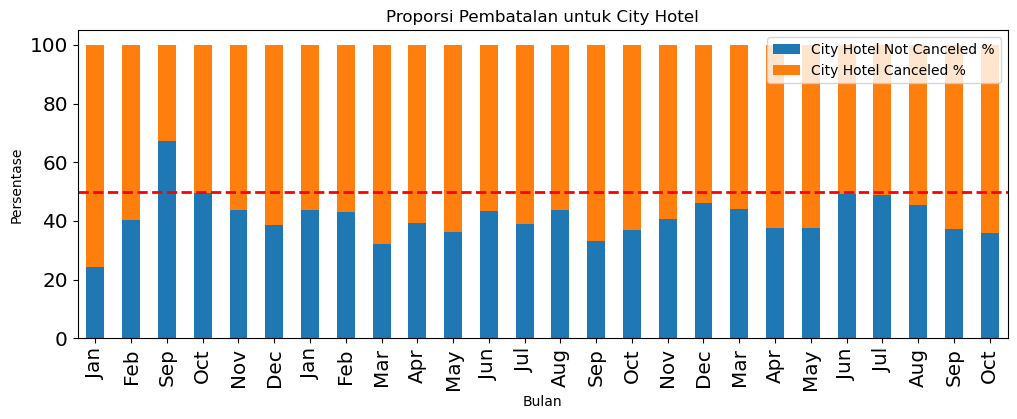

In [ ]:
df_new['Total'] = df_new['City Hotel Canceled'] + df_new['City Hotel Not Canceled']

# Hitung proporsi (persentase) untuk setiap kolom
df_new['City Hotel Canceled %'] = df_new['City Hotel Canceled'] / df_new['Total'] * 100
df_new['City Hotel Not Canceled %'] = df_new['City Hotel Not Canceled'] / df_new['Total'] * 100

# Buat diagram batang bertumpuk menggunakan matplotlib
plt.figure(figsize=(10, 6))
df_new.set_index('Month')[['City Hotel Not Canceled %', 'City Hotel Canceled %']].plot(kind='bar', stacked=True)

# Tambahkan garis horizontal pada 50%
plt.axhline(50, color='red', linestyle='--', linewidth=2)

# Tambahkan judul dan label
plt.title('Proporsi Pembatalan untuk City Hotel')
plt.xlabel('Bulan')
plt.ylabel('Persentase')

# Tampilkan grafik
plt.show()

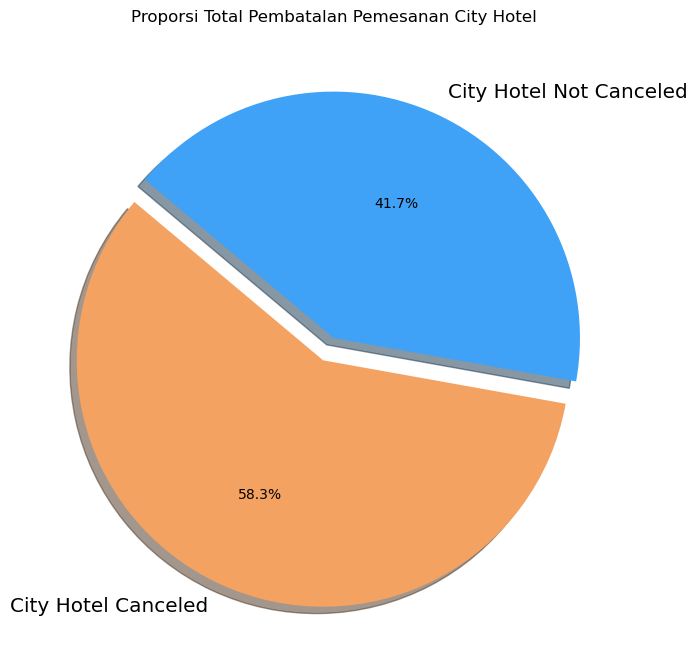

In [ ]:
# Hitung total nilai untuk setiap kategori
total_city_hotel_can = df_new['City Hotel Canceled'].sum()
total_city_hotel_notcan = df_new['City Hotel Not Canceled'].sum()

# Buat dictionary untuk nilai total
total_values = {
    'City Hotel Canceled': total_city_hotel_can,
    'City Hotel Not Canceled': total_city_hotel_notcan
}

# Buat diagram lingkaran
labels = total_values.keys()
sizes = total_values.values()
colors = ['#F4A261','#3FA2F6']
explode = (0.1, 0)  # Pisahkan sedikit irisan pertama

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)

# Tambahkan judul
plt.title('Proporsi Total Pembatalan Pemesanan City Hotel')

# Tampilkan grafik
plt.show()

#### RESORT HOTEL

<Figure size 1000x600 with 0 Axes>

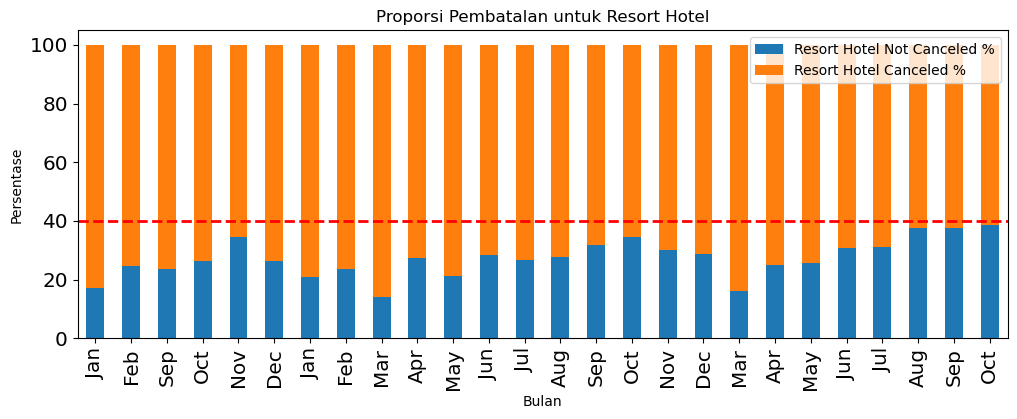

In [ ]:
df_new['Total'] = df_new['Resort Hotel Canceled'] + df_new['Resort Hotel Not Canceled']

# Hitung proporsi (persentase) untuk setiap kolom
df_new['Resort Hotel Canceled %'] = df_new['Resort Hotel Canceled'] / df_new['Total'] * 100
df_new['Resort Hotel Not Canceled %'] = df_new['Resort Hotel Not Canceled'] / df_new['Total'] * 100

# Buat diagram batang bertumpuk menggunakan matplotlib
plt.figure(figsize=(10, 6))
df_new.set_index('Month')[['Resort Hotel Not Canceled %', 'Resort Hotel Canceled %']].plot(kind='bar', stacked=True)

# Tambahkan garis horizontal pada 50%
plt.axhline(40, color='red', linestyle='--', linewidth=2)

# Tambahkan judul dan label
plt.title('Proporsi Pembatalan untuk Resort Hotel')
plt.xlabel('Bulan')
plt.ylabel('Persentase')

# Tampilkan grafik
plt.show()

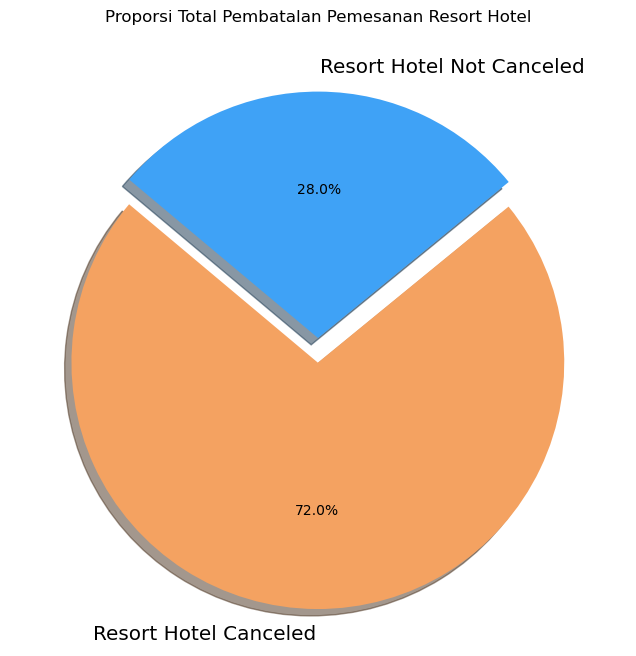

In [ ]:
# Hitung total nilai untuk setiap kategori
total_resort_hotel_can = df_new['Resort Hotel Canceled'].sum()
total_resort_hotel_notcan = df_new['Resort Hotel Not Canceled'].sum()

# Buat dictionary untuk nilai total
total_values = {
    'Resort Hotel Canceled': total_resort_hotel_can,
    'Resort Hotel Not Canceled': total_resort_hotel_notcan
}

# Buat diagram lingkaran
labels = total_values.keys()
sizes = total_values.values()
colors = ['#F4A261','#3FA2F6']
explode = (0.1, 0)  # Pisahkan sedikit irisan pertama

plt.figure(figsize=(8, 8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=140)

# Tambahkan judul
plt.title('Proporsi Total Pembatalan Pemesanan Resort Hotel')

# Tampilkan grafik
plt.show()